The above snippet shows how you can create a 3D rendered scene in a few lines of codes (from http://zulko.github.io/blog/2014/11/13/things-you-can-do-with-python-and-pov-ray/):

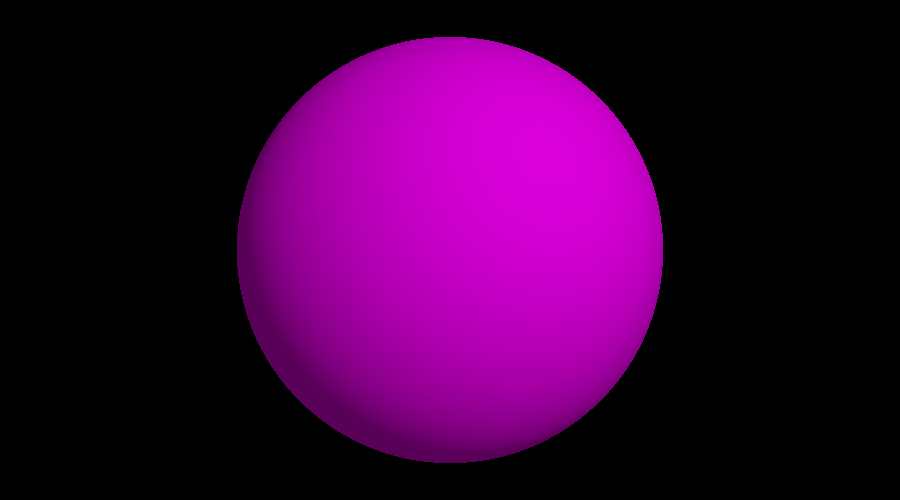

In [1]:
import vapory

camera = vapory.Camera( 'location', [0, 2, -3], 'look_at', [0, 1, 2] )
light = vapory.LightSource( [2, 4, -3], 'color', [1, 1, 1] )
sphere = vapory.Sphere( [0, 1, 2], 2, vapory.Texture( vapory.Pigment( 'color', [1, 0, 1] )))

scene = vapory.Scene(camera = camera , # a Camera object
                     objects = [light, sphere], # POV-Ray objects (items, lights)
                     included = ["colors.inc"]) # headers that POV-Ray may need

# passing 'ipython' as argument at the end of an IPython Notebook cell
# will display the picture in the IPython notebook.
scene.render('ipython', width=900, height=500)

Here are more details...

<!-- TEASER_END -->

On MacOsX, you may use ``homebrew`` to do the installation of povray:

    brew install povray
    
Once compiled, follow instructions on https://github.com/Zulko/vapory/blob/master/README.rst, that is:

    pip install vapory

The code snippet should now work as expected.

Some more examples:

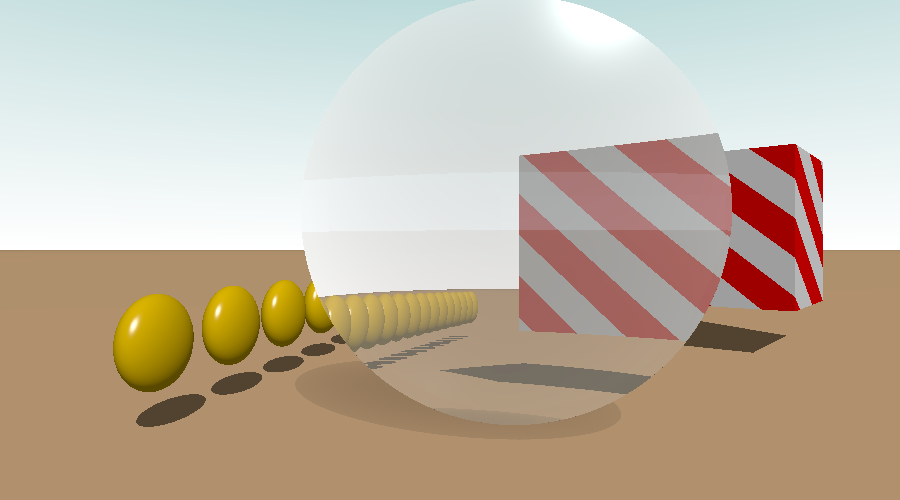

In [2]:
from vapory import *
sun = LightSource([1000,2500,-2500], 'color', 'White')
sky = Sphere( [0,0,0],1, 'hollow',
Texture( Pigment( 'gradient', [0,1,0],
ColorMap([0.0, 'color', 'White'],
[0.5, 'color', 'CadetBlue'],
[1.0, 'color', 'CadetBlue']),
"quick_color", "White"),
Finish( 'ambient', 1, 'diffuse', 0)
),
'scale', 10000)
ground = Plane( [0,1,0], 0,
Texture( Pigment( 'color', [0.85,0.55,0.30]),
Finish( 'phong', 0.1)
)
)
balls = Object( Union(*[Sphere([0,0,i],0.35,
Texture( Pigment('color', [1,0.65,0]),
Finish('phong',1)))
for i in range(20)]),
'scale', [0.4, 0.75, 0.75],
'rotate', [0,5,0],
'translate', [-1.9, 0.5, 0])
box = Box([-1,-1,-1], [1,1,1],
'scale', [1.5,0.75,0.75],
'rotate', [0,35, 0],
'translate', [1.75,1.2,4.0],
Texture( Pigment( 'Candy_Cane',
'scale', 0.5,
'translate', [-2.0,0,0],
'quick_color', 'Orange'),
Finish( 'phong', 1)
)
)
r, over = 6.0, 0.1 # sphere radius, and spheres overlap
lens = Intersection( Sphere( [0,0,0], r, 'translate', [0,0,-r+over]),
Sphere( [0,0,0], r, 'translate', [0,0, r-over]),
Texture('T_Glass3'),
Interior('I_Glass3'),
'translate', [0,1.2,0])
scene = Scene( Camera('angle', 75,
'location', [0.0 , 1.0,-3.0],
'look_at', [-0.3 , 1.0 , 0.0]),
objects = [sun, sky, ground, balls, box, lens],
included = ["colors.inc", "textures.inc", "glass.inc"],
defaults = [Finish( 'ambient', 0.1, 'diffuse', 0.9)] )
scene.render('ipython', width=900, height=500)

or :

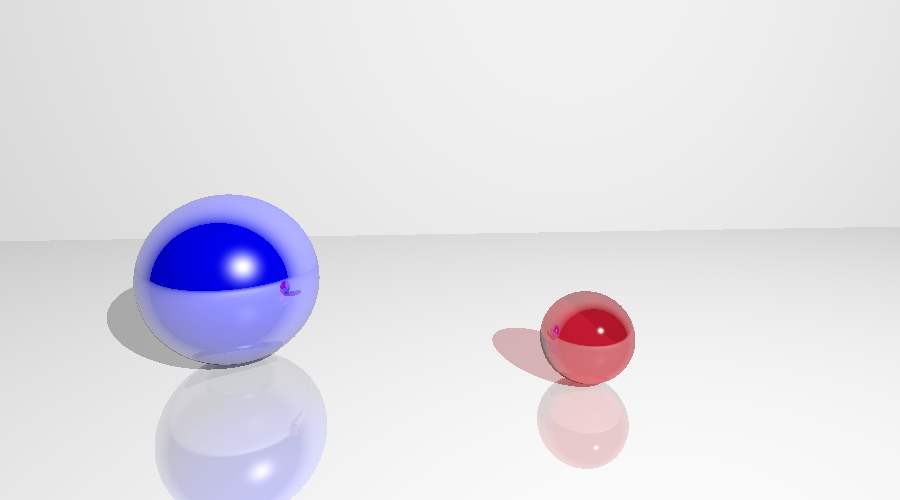

In [3]:
from vapory import *

light = LightSource([10, 15, -20], [1.3, 1.3, 1.3])
wall = Plane([0, 0, 1], 20, Texture(Pigment('color', [1, 1, 1])))
ground = Plane( [0, 1, 0], 0,
                Texture( Pigment( 'color', [1, 1, 1]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.4,
                                 'metallic', 0.3)))
sphere1 = Sphere([-4, 2, 2], 2.0, Pigment('color', [0, 0, 1]),
                                           Finish('phong', 0.8,
                                                  'reflection', 0.5))
sphere2 =Sphere([4, 1, 0], 1.0, Texture('T_Ruby_Glass'),
                Interior('ior',2))

scene = Scene( Camera("location", [0, 5, -10], "look_at", [1, 3, 0]),
               objects = [ ground, wall, sphere1, sphere2, light],
               included=["glass.inc"] )
scene.render('ipython', width=900, height=500)

I wish to imagine a set of reflecting planes:

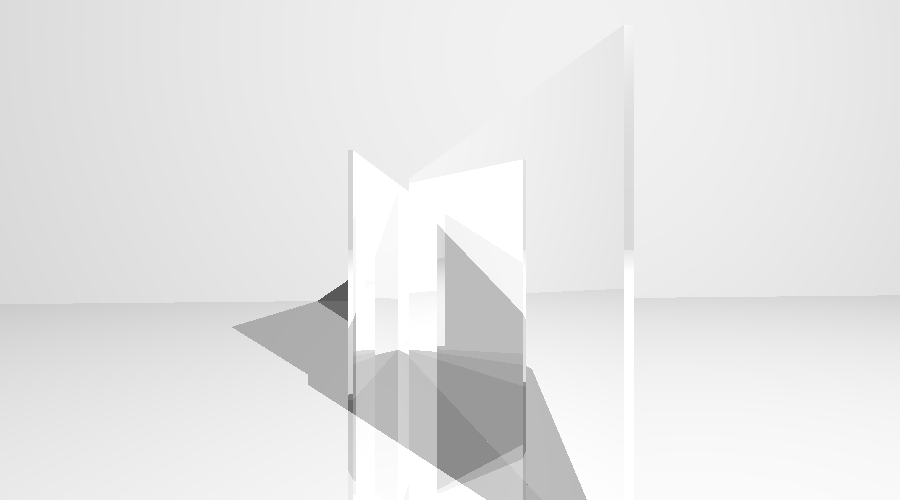

In [4]:
from vapory import *

lx, ly, lz = .1, 10.0, 10.0

light = LightSource([10, 15, -20], [1.3, 1.3, 1.3])
wall = Plane([0, 0, 1], 20, Texture(Pigment('color', [1, 1, 1])))
ground = Plane( [0, 1, 0], 0,
                Texture( Pigment( 'color', [1, 1, 1]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.4,
                                 'metallic', 0.3)))

# for transformations, see http://www.povray.org/documentation/view/3.6.1/49/
reflection = 1.

plane1 = Box([-lx/2, -ly/2, -lz/2], [lx/2, ly/2, lz/2], Pigment('color', [1, 1, 1]),
                                  Finish('phong', 0.8, 'reflection', reflection),
                                  'translate', (1, 0, -1), 'rotate', (0, -10, 0))
plane2 = Box([-lx/2, -ly/2, -lz/2], [lx/2, ly/2, lz/2], Pigment('color', [1, 1, 1]),
                                  Finish('phong', 0.8, 'reflection', reflection),
                                  'translate', (-1, 0, 5), 'rotate', (0, 10, 0))

scene = Scene( Camera("location", [0, 3, -10], "look_at", [1, 3, 0]),
               objects = [ ground, wall, plane1, plane2, light],
               included=["glass.inc"] )
scene.render('ipython', width=900, height=500)